**Task - 9 :- Time-Based Historical Image Colorization**

In [ ]:
# Install basic dependencies
!pip install -q opencv-python matplotlib ipywidgets


In [ ]:
from google.colab import files
uploaded = files.upload()
img_path = next(iter(uploaded))



Saving old.jpg to old.jpg


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display


In [ ]:
gray_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
gray_rgb = cv2.cvtColor(gray_img, cv2.COLOR_GRAY2RGB)

# Dummy classifier (replace with real model later)
def predict_era(image):
    return "1950s"

predicted_era = predict_era(gray_img)


In [ ]:
# Define RGB tints for each era
era_palettes = {
    "1900s": [180, 140, 120],
    "1920s": [200, 180, 160],
    "1940s": [160, 170, 140],
    "1950s": [220, 190, 170],
    "1970s": [240, 200, 180],
}

# Function to apply tint
def apply_color_tint(gray_img, era):
    tint = era_palettes.get(era, [200, 180, 160])
    color_img = cv2.cvtColor(gray_img, cv2.COLOR_GRAY2BGR)
    tint_layer = np.full_like(color_img, tint)
    colorized = cv2.addWeighted(color_img, 0.5, tint_layer, 0.5, 0)
    return colorized


In [ ]:
# GUI widgets
era_dropdown = widgets.Dropdown(
    options=list(era_palettes.keys()),
    value=predicted_era,
    description='Era:',
)

button = widgets.Button(description="Colorize")


Dropdown(description='Era:', index=3, options=('1900s', '1920s', '1940s', '1950s', '1970s'), value='1950s')

Button(description='Colorize', style=ButtonStyle())

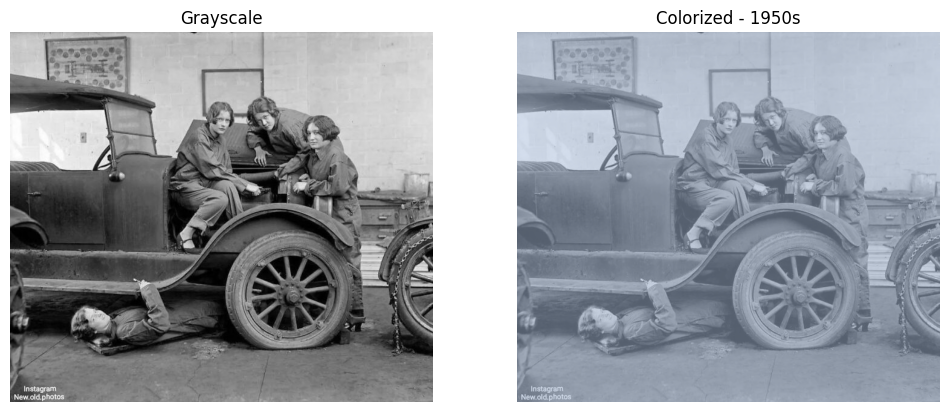

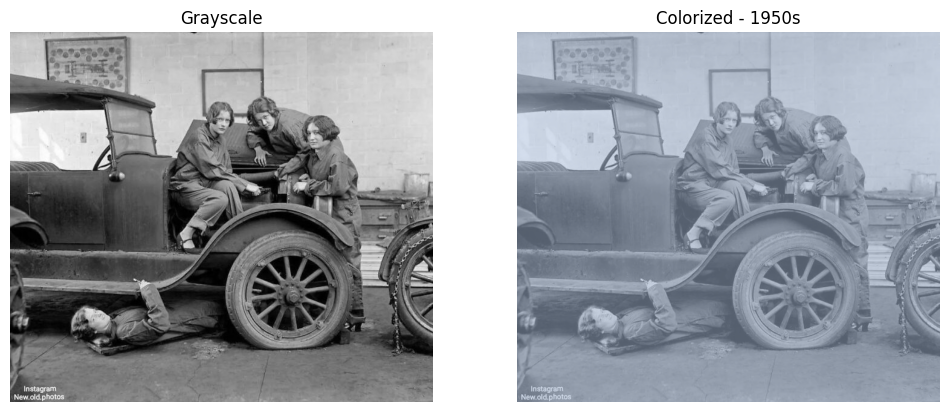

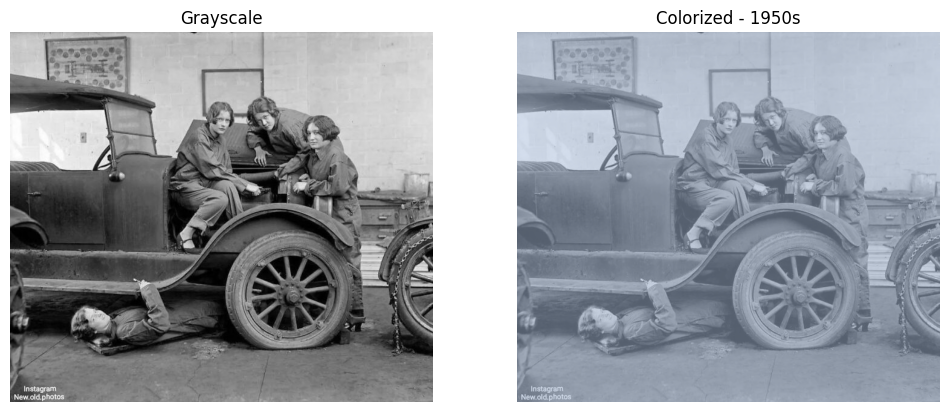

In [ ]:
def on_button_clicked(b):
    selected_era = era_dropdown.value
    colorized = apply_color_tint(gray_img, selected_era)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(gray_rgb)
    plt.title("Grayscale")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(colorized, cv2.COLOR_BGR2RGB))
    plt.title(f"Colorized - {selected_era}")
    plt.axis('off')
    plt.show()

button.on_click(on_button_clicked)
display(era_dropdown, button)
